In [35]:
# Import raw data from Excel
import pandas as pd

filepath = 'C://Users//PXY//Desktop//Traffic Management//training.csv';
sheetname = 'main'
df = pd.read_csv ( filepath );
df.head(10)

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468
5,qp03tu,1,12:15,0.023843
6,qp096d,25,3:30,0.007460
7,qp03nr,51,20:45,0.000293
8,qp093r,48,6:15,0.054170
9,qp03r2,4,22:15,0.123463


In [36]:
import geohash2 as gh
df['decoded_geo'] = df.apply(lambda x:gh.decode(x.geohash6), axis = 1)
latitude = [];
longtitude = [];
for coordinates in df['decoded_geo']:
  latitude.append( float( coordinates[0] ) )
  longtitude.append( float( coordinates[1] ) )
    
df['latitude'] = latitude;
df['longtitude'] = longtitude;

print( min(latitude), max(latitude), min( longtitude), max(longtitude) );

df.to_csv( 'C://Users//PXY//Desktop//Traffic Management//training_compile.csv' );

-5.48 -5.24 90.6 91.0


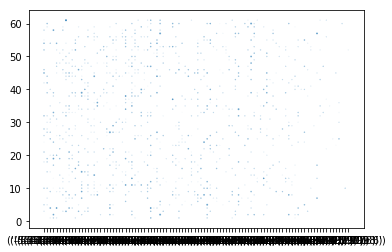

In [46]:
newdf = pd.read_csv( 'C://Users//PXY//Desktop//Traffic Management//training_compile.csv', nrows = 1000 );

#print( len( df.decoded_geo.unique() ) )

import matplotlib.pyplot as plt
import numpy as np

#a = np.random.random((16, 16))
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.show()

#import numpy as np
#import matplotlib.pyplot as plt

x = newdf['decoded_geo']
y = newdf['day']

area = newdf['demand']
plt.scatter(x, y, s=area,  alpha=0.5)
plt.show()


# find center point based on all X & y, calculate absolute distance : give you misleading results
# (0,1) will give same distance as (1,0)
